In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data = pd.read_csv('Documents/Project/prodigy tasks/US_Accidents_March23.csv')

In [87]:
print(data)

                ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        NaN   
2        2016-02-08 07:19:2

In [88]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [89]:
Missing_data = data.isnull().sum()

<Axes: >

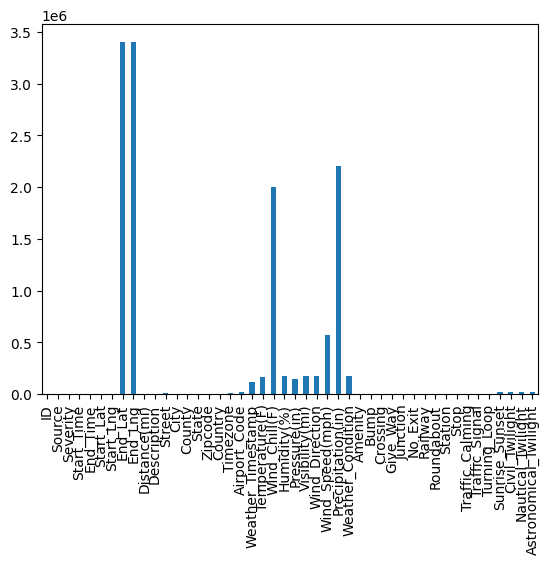

In [90]:
Missing_data.plot(kind='bar')

In [91]:
cities = data.City.unique()
len(cities)
cities

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [92]:
mean_end_lat = data['End_Lat'].mean()
mean_end_lag = data['End_Lng'].mean()

# Replace missing values in 'End_lat' column with the mean
data['End_Lat'].fillna(mean_end_lat, inplace=True)
data['End_Lng'].fillna(mean_end_lag,inplace=True)

In [93]:
# For 'street' column
most_common_street = data['Street'].mode()[0]
data['Street'].fillna(most_common_street, inplace=True)

# For 'city' column
most_common_city = data['City'].mode()[0]
data['City'].fillna(most_common_city, inplace=True)

most_common_Zipcode = data['Zipcode'].mode()[0]
data['Zipcode'].fillna(most_common_Zipcode, inplace=True)

most_common_Humidity = data['Humidity(%)'].mode()[0]
data['Humidity(%)'].fillna(most_common_Humidity, inplace=True)

most_common_Pressure= data['Pressure(in)'].mode()[0]
data['Pressure(in)'].fillna(most_common_Pressure, inplace=True)

most_common_Visibility = data['Visibility(mi)'].mode()[0]
data['Visibility(mi)'].fillna(most_common_Visibility, inplace=True)

most_common_Civil_Twilight = data['Civil_Twilight'].mode()[0]
data['Civil_Twilight'].fillna(most_common_Civil_Twilight, inplace=True)

most_common_Nautical_Twilight = data['Nautical_Twilight'].mode()[0]
data['Nautical_Twilight'].fillna(most_common_Nautical_Twilight, inplace=True)

most_common_Astronomical_Twilight = data['Astronomical_Twilight'].mode()[0]
data['Astronomical_Twilight'].fillna(most_common_Astronomical_Twilight, inplace=True)


In [94]:
print(data.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    5
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [95]:
cities_by_accident = data.City.value_counts()
cities_by_accident

City
Miami                           187170
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

C:\Users\KASHISH RANA\AppData\Local\Temp\ipykernel_23912\3405282844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

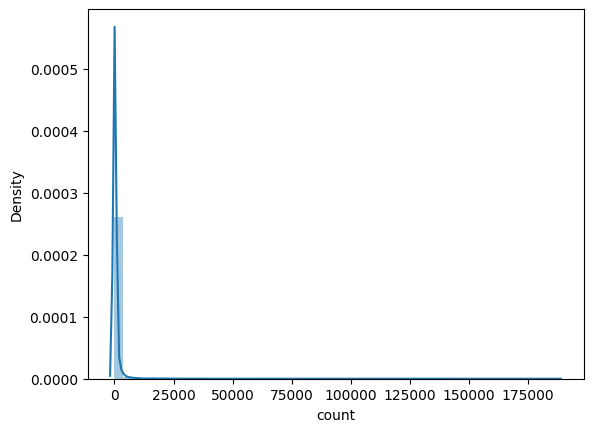

In [96]:
sns.distplot(cities_by_accident)

In [97]:
# data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data.Start_Time = pd.to_datetime(data.Start_Time, format='mixed')

In [98]:
# Extract time components
data['Hour'] = data['Start_Time'].dt.hour
data['DayOfWeek'] = data['Start_Time'].dt.dayofweek
data['Month'] = data['Start_Time'].dt.month
data['year'] = data['Start_Time'].dt.year

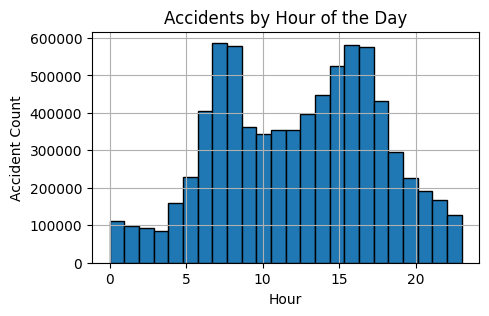

In [99]:
plt.figure(figsize=(5,3))
plt.hist(data['Hour'],bins=24, edgecolor='black')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()


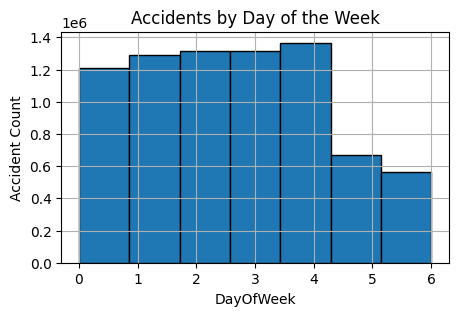

In [100]:
# Show the figures
plt.figure(figsize=(5,3))
plt.hist(data['DayOfWeek'],bins=7, edgecolor='black')
plt.title('Accidents by Day of the Week')
plt.xlabel('DayOfWeek')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()

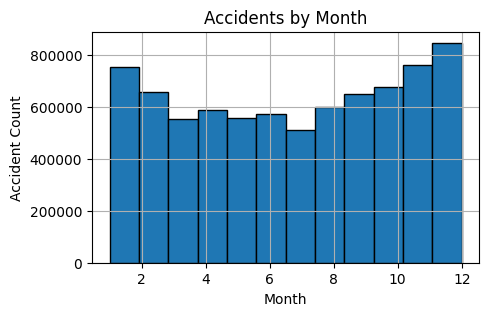

In [101]:
# Show the figures
plt.figure(figsize=(5,3))
plt.hist(data['Month'],bins=12, edgecolor='black')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()



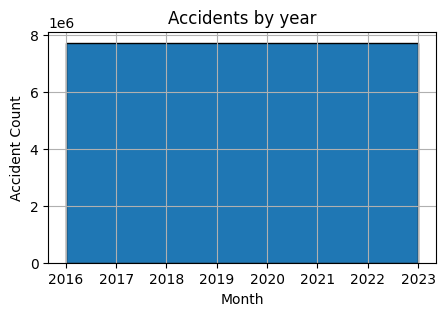

In [102]:
# Show the figures
plt.figure(figsize=(5,3))
plt.hist(data['year'],bins=1, edgecolor='black')
plt.title('Accidents by year')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

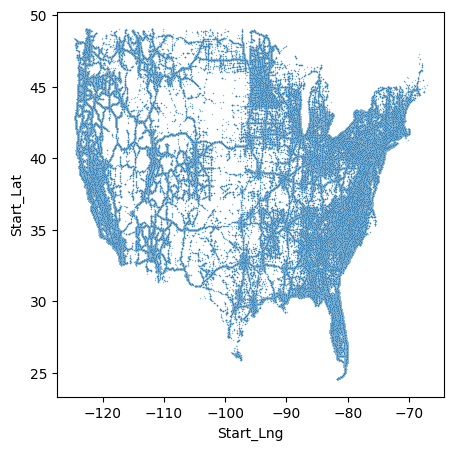

In [103]:
plt.figure(figsize=(5,5))
sns.scatterplot(y=data['Start_Lat'], x=data['Start_Lng'], alpha=0.5, s=1)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

C:\Users\KASHISH RANA\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\KASHISH RANA\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


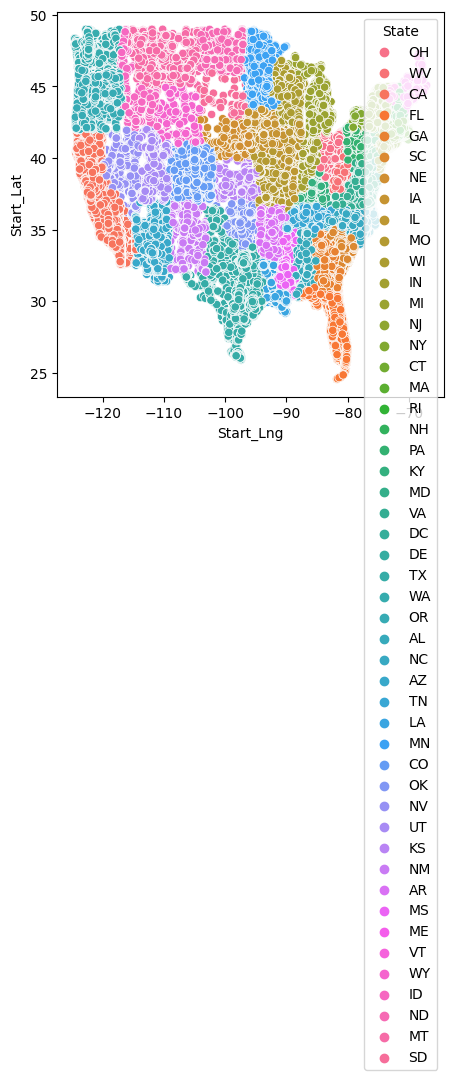

In [104]:
plt.figure(figsize=(5,5))
sns.scatterplot(y=data['Start_Lat'], x=data['Start_Lng'],hue=data['State']) 

In [105]:
State_count = data.State.value_counts()[:25]

C:\Users\KASHISH RANA\AppData\Local\Temp\ipykernel_23912\220925315.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,2),(0,0))


Text(0.5, 1.0, 'least Severe Accidents: Severity=1')

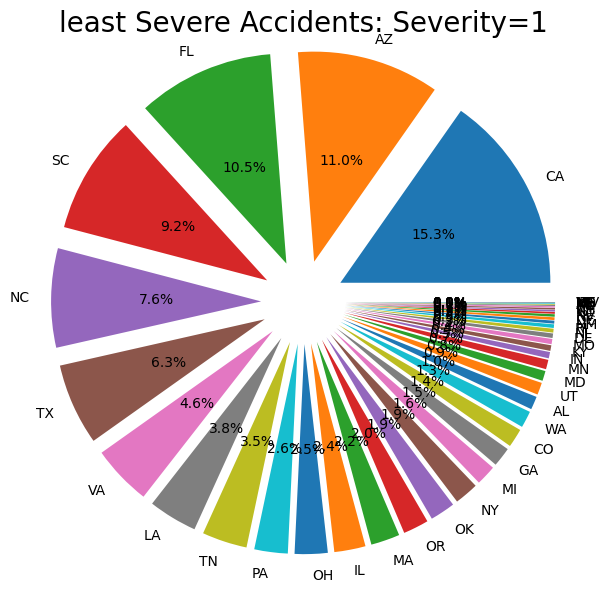

In [106]:
# Segregating accidents on the basis of severity
severe_accidents_1 = data[data.Severity==1].State.value_counts() 

fig, ax1 = plt.subplots(figsize=[15,15])
ax1 = plt.subplot2grid((2,2),(0,0))
labels = severe_accidents_1.keys()
plt.pie(x=severe_accidents_1, autopct="%.1f%%", explode=[0.2]*len(severe_accidents_1), labels=labels, pctdistance=0.5)
plt.title("least Severe Accidents: Severity=1", fontsize=20)             

C:\Users\KASHISH RANA\AppData\Local\Temp\ipykernel_23912\373209183.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,2),(0,1))


Text(0.5, 1.0, 'less Severe Accidents: Severity=2')

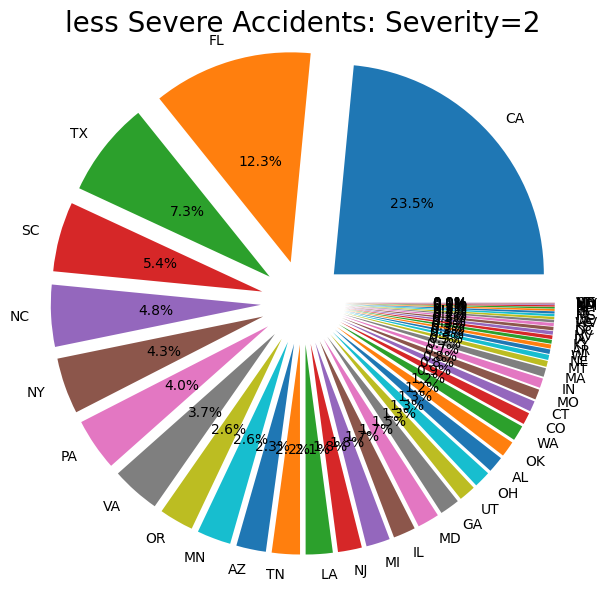

In [107]:

severe_accidents_2 = data[data.Severity==2].State.value_counts()
 
fig, ax1 = plt.subplots(figsize=[15,15])
ax1 = plt.subplot2grid((2,2),(0,1))
labels = severe_accidents_2.keys()
plt.pie(x=severe_accidents_2, autopct="%.1f%%", explode=[0.2]*len(severe_accidents_2), labels=labels, pctdistance=0.5)
plt.title("less Severe Accidents: Severity=2", fontsize=20)


C:\Users\KASHISH RANA\AppData\Local\Temp\ipykernel_23912\1574427163.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,2),(1,0))


Text(0.5, 1.0, 'Severe Accidents: Severity=3')

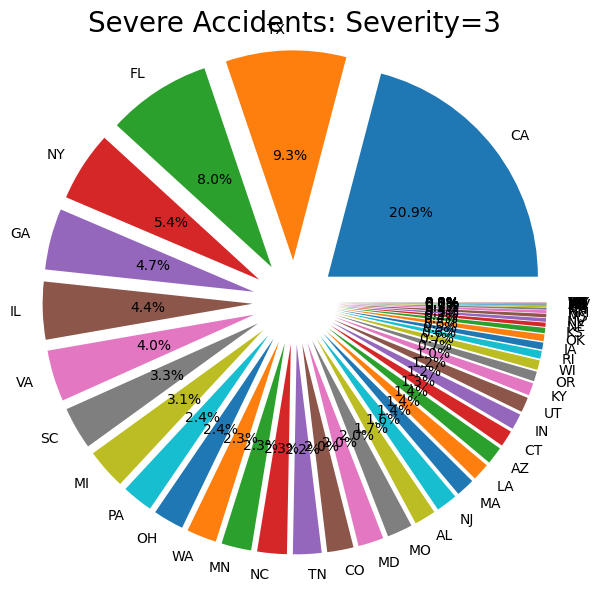

In [108]:
severe_accidents_3 = data[data.Severity==3].State.value_counts()

fig, ax1 = plt.subplots(figsize=[15,15])
ax1 = plt.subplot2grid((2,2),(1,0))
labels = severe_accidents_3.keys()
plt.pie(x=severe_accidents_3, autopct="%.1f%%", explode=[0.2]*len(severe_accidents_3), labels=labels, pctdistance=0.5)
plt.title("Severe Accidents: Severity=3", fontsize=20)

C:\Users\KASHISH RANA\AppData\Local\Temp\ipykernel_23912\3212395413.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,2),(1,1))


Text(0.5, 1.0, 'Most Severe Accidents: Severity=4')

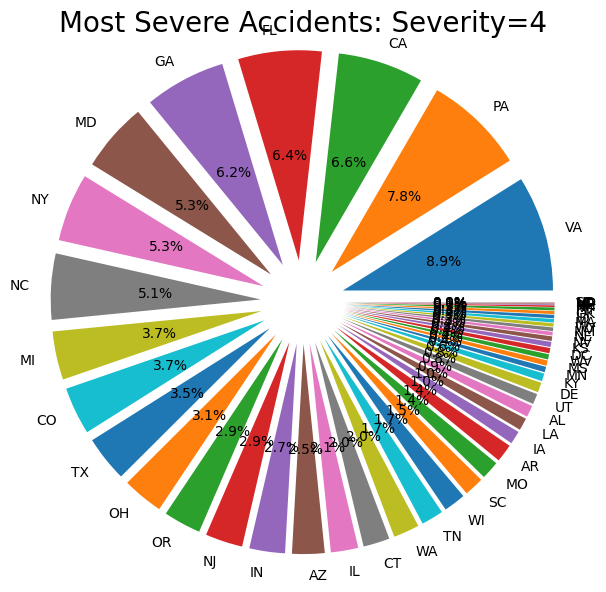

In [109]:

severe_accidents_4 = data[data.Severity==4].State.value_counts()

fig, ax1 = plt.subplots(figsize=[15,15])
ax1 = plt.subplot2grid((2,2),(1,1))
labels = severe_accidents_4.keys()
plt.pie(x=severe_accidents_4, autopct="%.1f%%", explode=[0.2]*len(severe_accidents_4), labels=labels, pctdistance=0.5)
plt.title("Most Severe Accidents: Severity=4", fontsize=20)

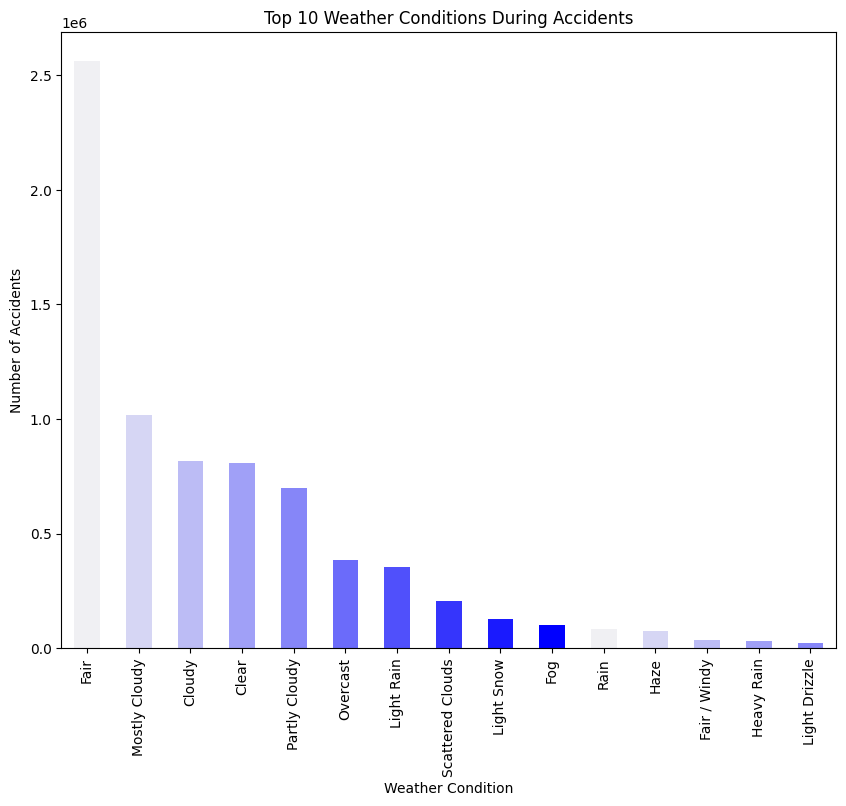

In [111]:
blue_palette = sns.light_palette("blue", n_colors=10)

plt.figure(figsize=(10, 8))
data['Weather_Condition'].value_counts().head(15).plot(kind='bar', color=blue_palette)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

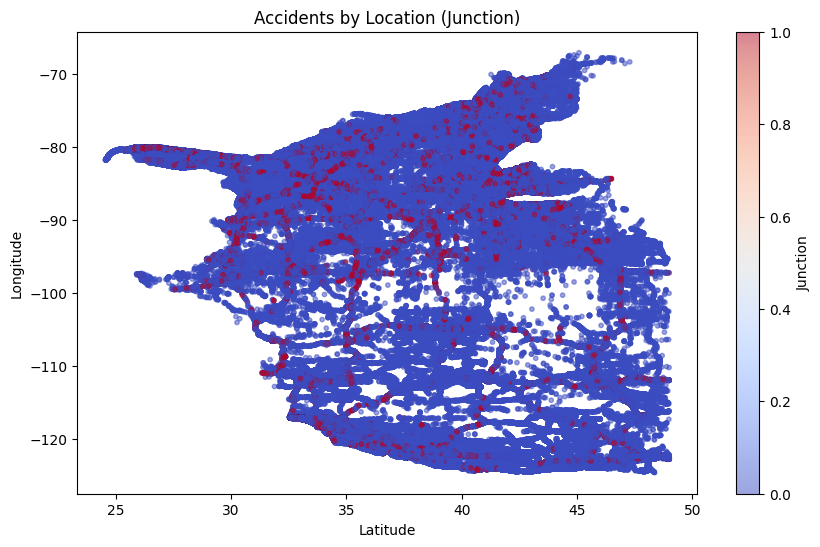

In [50]:
# Scatter plot for Accidents by Location with Junction feature
plt.figure(figsize=(10, 6))
plt.scatter(data['Start_Lat'], data['Start_Lng'], c=data['Junction'], cmap='coolwarm', alpha=0.5, s=10)
plt.title('Accidents by Location (Junction)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Junction')
plt.show()

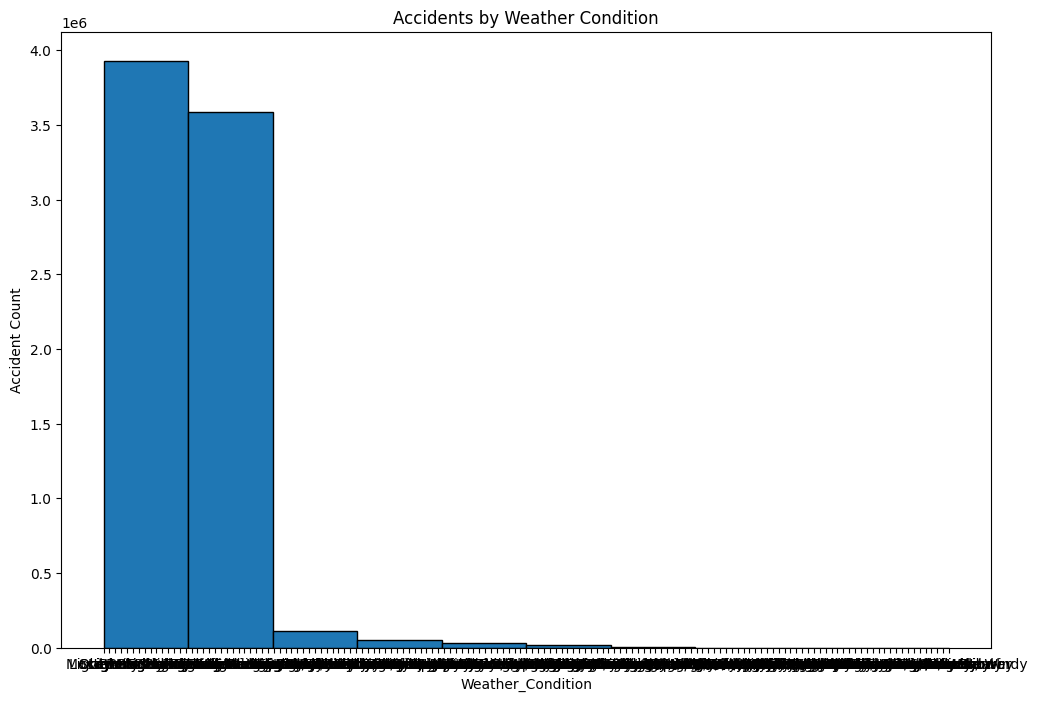

In [34]:
# Weather condition analysis

# Show the figures
plt.figure(figsize=(12,8))
plt.hist(data['Weather_Condition'].astype('str'),edgecolor='black')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather_Condition')
plt.ylabel('Accident Count')
plt.show()

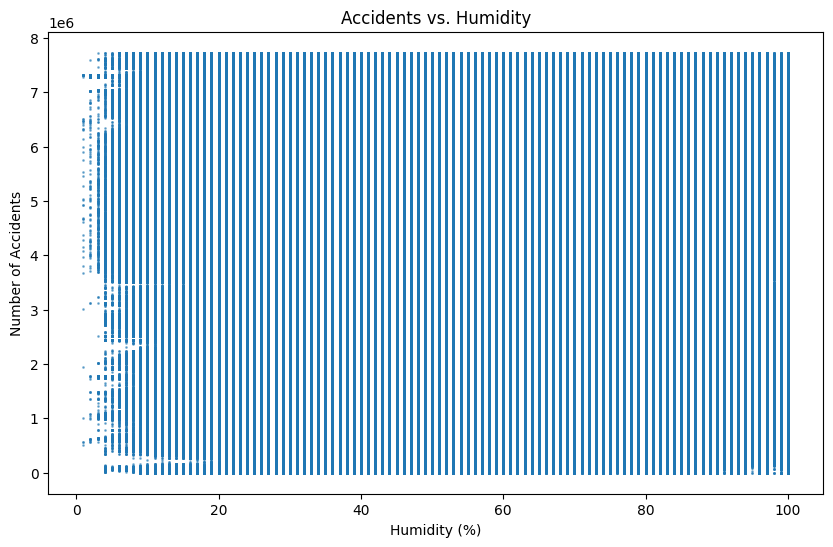

In [41]:
# Plotting the relationship between humidity and number of accidents
plt.figure(figsize=(10, 6))
plt.scatter(data['Humidity(%)'], data.index, alpha=0.5, s=1)
plt.title('Accidents vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Accidents')
plt.show()


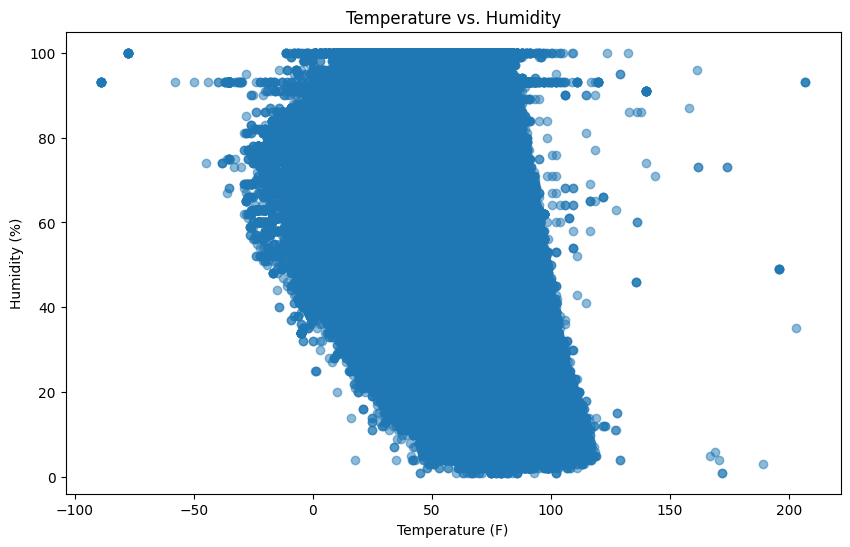

In [44]:
# Temperature vs. Humidity
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature(F)'], data['Humidity(%)'], alpha=0.5)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (F)')
plt.ylabel('Humidity (%)')
plt.show()

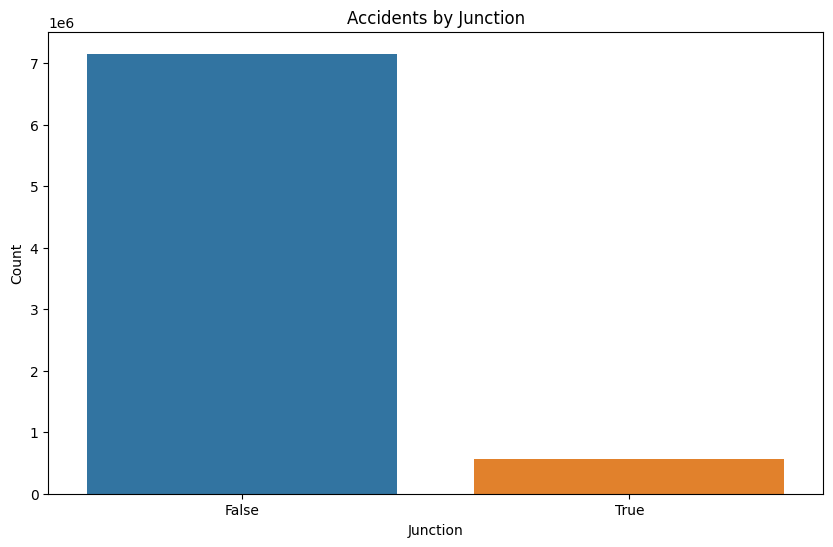

In [45]:
# Accidents by Junction
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Junction')
plt.title('Accidents by Junction')
plt.xlabel('Junction')
plt.ylabel('Count')
plt.show()


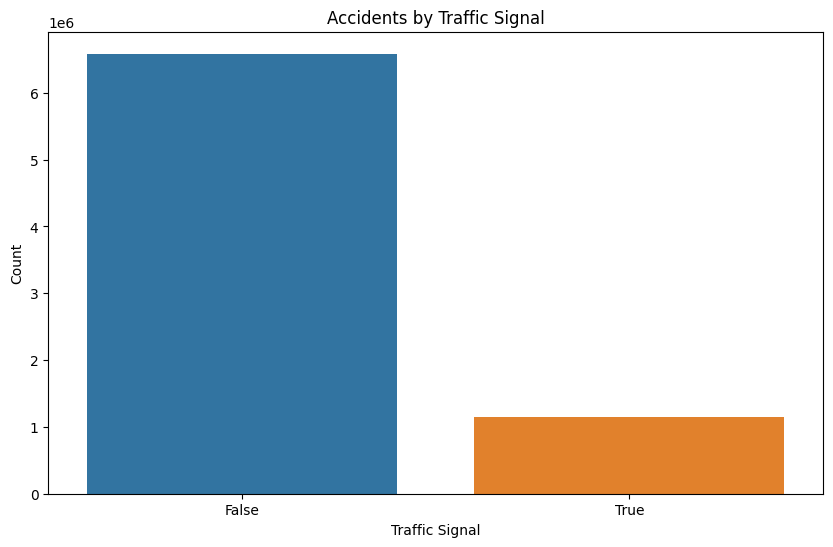

In [46]:

# Accidents by Traffic Signal
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Traffic_Signal')
plt.title('Accidents by Traffic Signal')
plt.xlabel('Traffic Signal')
plt.ylabel('Count')
plt.show()


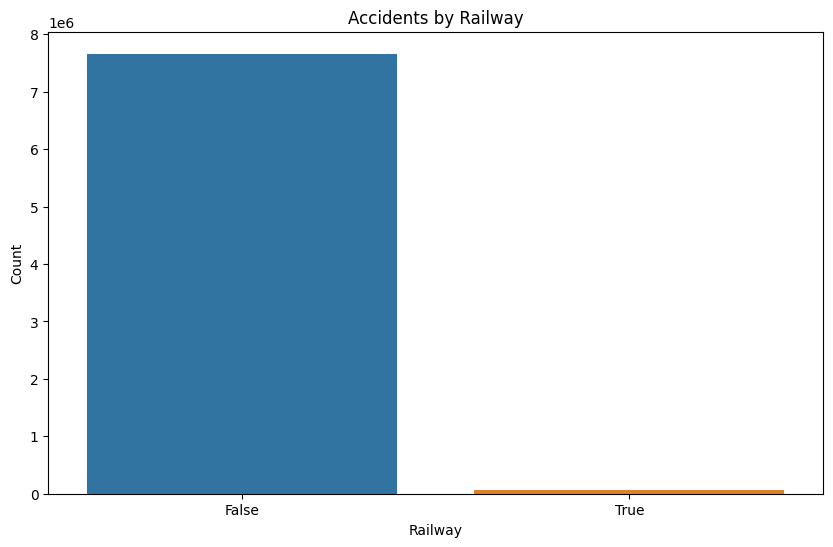

In [47]:

# Accidents by Railway
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Railway')
plt.title('Accidents by Railway')
plt.xlabel('Railway')
plt.ylabel('Count')
plt.show()

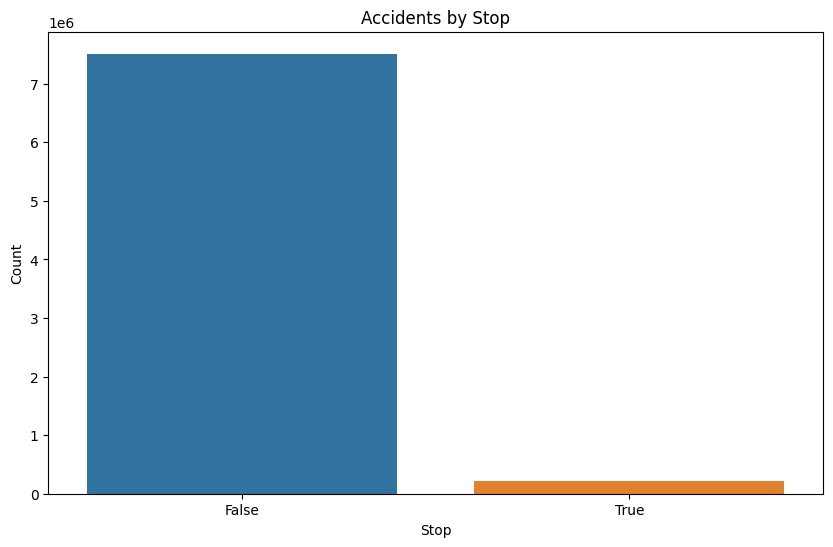

In [48]:

# Accidents by Stop
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Stop')
plt.title('Accidents by Stop')
plt.xlabel('Stop')
plt.ylabel('Count')
plt.show()


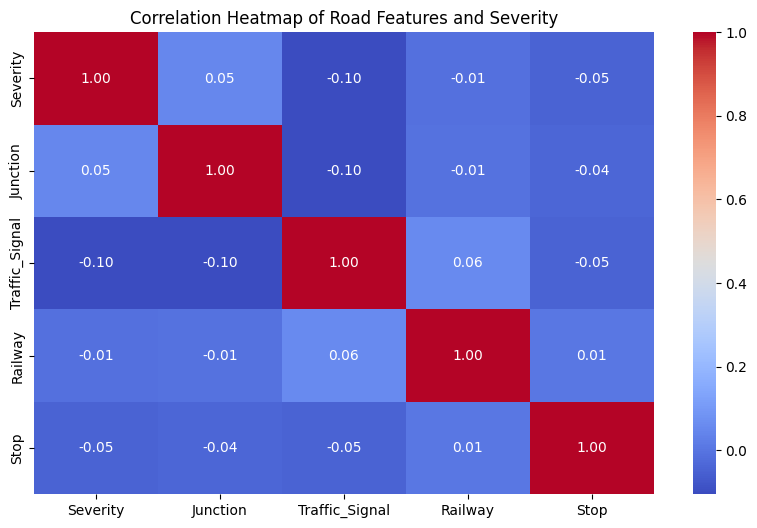

In [60]:
# Select relevant features for correlation
features = ['Severity', 'Junction', 'Traffic_Signal', 'Railway', 'Stop']
corr_matrix = data[features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Road Features and Severity')
plt.show()

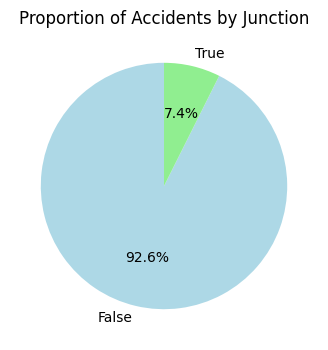

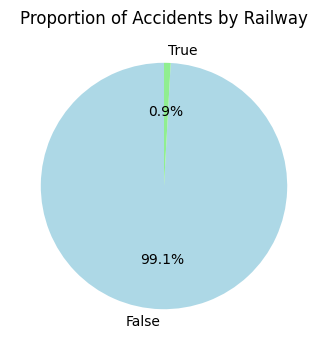

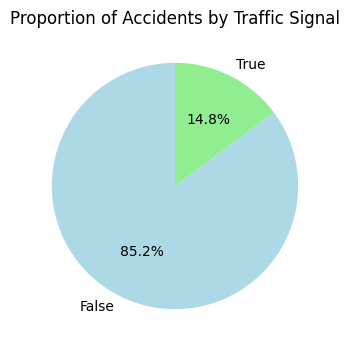

In [70]:
# Pie chart for Junction feature
junction_counts = data['Junction'].value_counts()
plt.figure(figsize=(4, 4))
junction_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Accidents by Junction')
plt.ylabel('')
plt.show()

# Pie chart for Railway feature
railway_counts = data['Railway'].value_counts()
plt.figure(figsize=(4, 4))
railway_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Accidents by Railway')
plt.ylabel('')
plt.show()

# Pie chart for Traffic Signal feature
traffic_signal_counts = data['Traffic_Signal'].value_counts()
plt.figure(figsize=(4, 4))
traffic_signal_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Accidents by Traffic Signal')
plt.ylabel('')
plt.show()

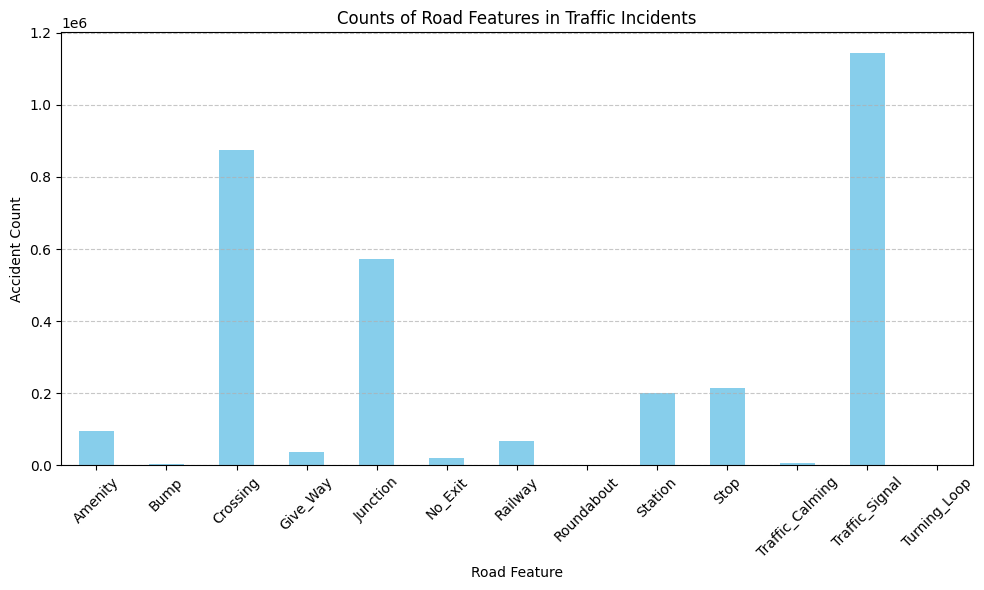

In [74]:
# Plotting road features
road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 
                 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
road_features_counts = data[road_features].sum()

plt.figure(figsize=(10, 6))
road_features_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Road Features in Traffic Incidents')
plt.xlabel('Road Feature')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [75]:
# Counting the number of accidents involving each road feature
road_features_accidents = data[road_features].sum()

# Creating a DataFrame to display the counts
road_features_accidents_df = pd.DataFrame(road_features_accidents, columns=['Accident_Count'])

road_features_accidents_df


,Accident_Count
Amenity,96334
Bump,3514
Crossing,873763
Give_Way,36582
Junction,571342
No_Exit,19545
Railway,66979
Roundabout,249
Station,201901
Stop,214371


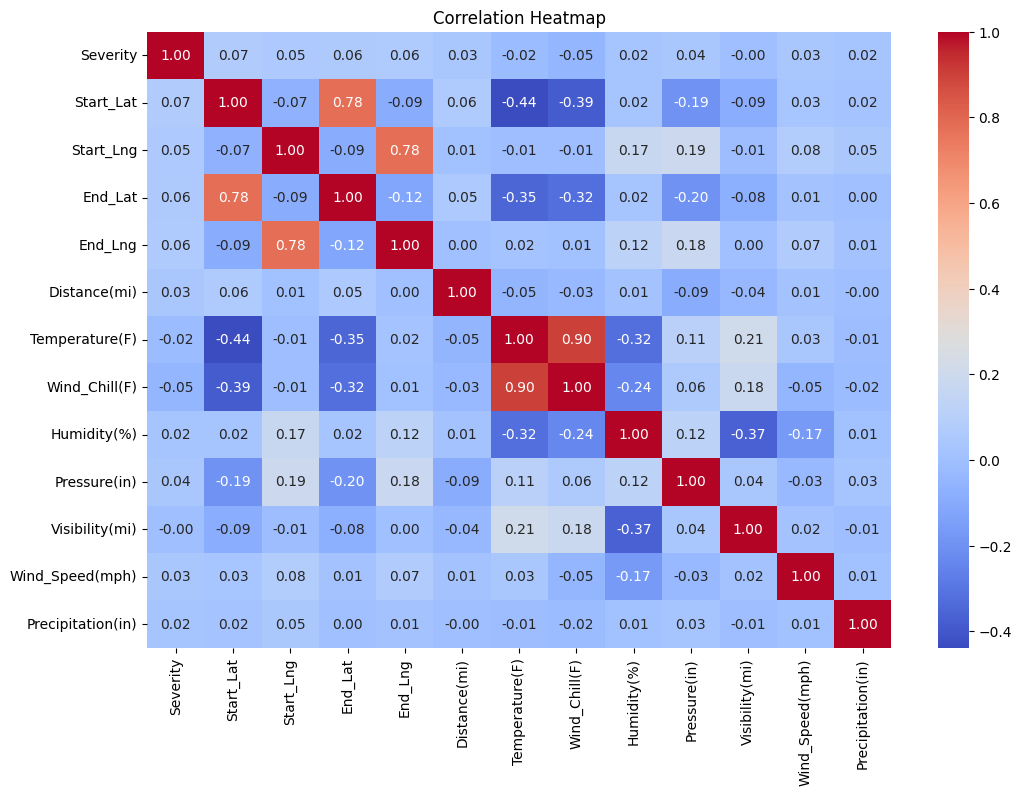

In [83]:
# Drop non-numeric columns
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()